In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import re

In [94]:
df_ts_series = pd.read_csv('df.ts.series2.csv')

In [95]:
df_ts_series = df_ts_series[df_ts_series['species'] != 'Pseudotsuga menziesii']

In [96]:
df_ts_series

,Unnamed: 0,site,tree.id,ts,twd,pr,at,ws,dp,sr,...,day.of.year_rolling30,site_longitude,site_latitude,site_easting,site_northing,mch_ind_closest,mch_easting,mch_northing,mch_elevation,mch_site_eucldist
0,1,Bachtel-Forest,1,2020-01-01,0.000000,-4.967054e-09,0.684757,1.197186,-3.640214,62.291590,...,NaN,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980
1,2,Bachtel-Forest,1,2020-01-02,0.121408,-1.092752e-07,0.213088,1.312338,-4.036302,60.923900,...,NaN,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980
2,3,Bachtel-Forest,1,2020-01-03,0.118271,1.285767e-01,2.009851,2.115951,-0.953911,55.859708,...,NaN,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980
3,4,Bachtel-Forest,1,2020-01-04,0.000000,9.927122e-02,1.573278,3.247398,0.721803,13.914832,...,NaN,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980
4,5,Bachtel-Forest,1,2020-01-05,0.000000,-1.986821e-08,-0.442240,2.159941,-4.094125,62.620516,...,NaN,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,46028,Sihlwald-Forest,42,2020-01-07,0.285428,2.295844e-02,1.842663,2.574209,-0.216778,37.274933,...,NaN,8.56111,47.25056,2.684971e+06,1.233901e+06,41819,2.684597e+06,1.233941e+06,722.265575,375.727303
46028,46029,Sihlwald-Forest,42,2020-01-08,0.258344,-6.457170e-07,3.056492,2.483577,-2.625516,47.995854,...,NaN,8.56111,47.25056,2.684971e+06,1.233901e+06,41819,2.684597e+06,1.233941e+06,722.265575,375.727303
46029,46030,Sihlwald-Forest,42,2020-01-09,0.509388,-1.182159e-06,4.842269,2.885992,-3.002886,54.513516,...,NaN,8.56111,47.25056,2.684971e+06,1.233901e+06,41819,2.684597e+06,1.233941e+06,722.265575,375.727303
46030,46031,Sihlwald-Forest,42,2020-01-10,0.603231,3.270944e-03,4.031820,3.103367,0.587544,39.948842,...,NaN,8.56111,47.25056,2.684971e+06,1.233901e+06,41819,2.684597e+06,1.233941e+06,722.265575,375.727303


In [97]:
df_ts_series.columns

Index(['Unnamed: 0', 'site', 'tree.id', 'ts', 'twd', 'pr', 'at', 'ws', 'dp',
       'sr', 'lr', 'series', 'species', 'year', 'diff.ts', 'diff.days',
       'cum.time.days', 'day.of.year', 'month', 'week', 'twd_rolling7',
       'pr_rolling7', 'at_rolling7', 'ws_rolling7', 'dp_rolling7',
       'sr_rolling7', 'lr_rolling7', 'day.of.year_rolling7', 'twd_rolling30',
       'pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30',
       'sr_rolling30', 'lr_rolling30', 'day.of.year_rolling30',
       'site_longitude', 'site_latitude', 'site_easting', 'site_northing',
       'mch_ind_closest', 'mch_easting', 'mch_northing', 'mch_elevation',
       'mch_site_eucldist'],
      dtype='object')

In [98]:
#df_ts_series = pd.get_dummies(df_ts_series, columns=['year', 'species'])

In [99]:
type(df_ts_series)
print(df_ts_series.columns)
df_ts_series = df_ts_series.dropna(subset=['twd_rolling30'])
print(df_ts_series['twd_rolling30'])

Index(['Unnamed: 0', 'site', 'tree.id', 'ts', 'twd', 'pr', 'at', 'ws', 'dp',
       'sr', 'lr', 'series', 'species', 'year', 'diff.ts', 'diff.days',
       'cum.time.days', 'day.of.year', 'month', 'week', 'twd_rolling7',
       'pr_rolling7', 'at_rolling7', 'ws_rolling7', 'dp_rolling7',
       'sr_rolling7', 'lr_rolling7', 'day.of.year_rolling7', 'twd_rolling30',
       'pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30',
       'sr_rolling30', 'lr_rolling30', 'day.of.year_rolling30',
       'site_longitude', 'site_latitude', 'site_easting', 'site_northing',
       'mch_ind_closest', 'mch_easting', 'mch_northing', 'mch_elevation',
       'mch_site_eucldist'],
      dtype='object')
29       0.565573
30       0.565573
31       0.561526
32       0.557584
33       0.557584
           ...   
46019    0.099176
46020    0.093326
46021    0.101662
46022    0.105229
46023    0.108795
Name: twd_rolling30, Length: 42680, dtype: float64


In [100]:
df_ts_series['site'] = df_ts_series['site'].astype(str)
df_ts_series['year'] = df_ts_series['year'].astype(str)
df_ts_series['species'] = df_ts_series['species'].astype(str)

encoders = {}
for col in ['site', 'species', 'year']:
    le = LabelEncoder()
    df_ts_series[col + '_enc'] = le.fit_transform(df_ts_series[col])
    encoders[col] = le

C:\Users\salom\AppData\Local\Temp\ipykernel_28580\595148286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_series['site'] = df_ts_series['site'].astype(str)
C:\Users\salom\AppData\Local\Temp\ipykernel_28580\595148286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_series['year'] = df_ts_series['year'].astype(str)
C:\Users\salom\AppData\Local\Temp\ipykernel_28580\595148286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [101]:
print(df_ts_series.columns)
df_ts_series["species_enc"]
# Assume you have these columns
print(df_ts_series['mch_elevation'])
print(df_ts_series['site'] )
print(df_ts_series['site_enc'] )

Index(['Unnamed: 0', 'site', 'tree.id', 'ts', 'twd', 'pr', 'at', 'ws', 'dp',
       'sr', 'lr', 'series', 'species', 'year', 'diff.ts', 'diff.days',
       'cum.time.days', 'day.of.year', 'month', 'week', 'twd_rolling7',
       'pr_rolling7', 'at_rolling7', 'ws_rolling7', 'dp_rolling7',
       'sr_rolling7', 'lr_rolling7', 'day.of.year_rolling7', 'twd_rolling30',
       'pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30',
       'sr_rolling30', 'lr_rolling30', 'day.of.year_rolling30',
       'site_longitude', 'site_latitude', 'site_easting', 'site_northing',
       'mch_ind_closest', 'mch_easting', 'mch_northing', 'mch_elevation',
       'mch_site_eucldist', 'site_enc', 'species_enc', 'year_enc'],
      dtype='object')
29       882.140575
30       882.140575
31       882.140575
32       882.140575
33       882.140575
            ...    
46019    722.265575
46020    722.265575
46021    722.265575
46022    722.265575
46023    722.265575
Name: mch_elevation, Length: 42680, dtyp

In [102]:
dynamic_features = ['pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30',
       'sr_rolling30', 'lr_rolling30', 'year_enc']
static_features = ['mch_elevation', 'site_enc', 'species_enc']  # static features
features = dynamic_features 
target_column = "twd_rolling30"

In [103]:
SEQ_LENGTH = 100

n_features = len(dynamic_features)  # your time series features
static_input_dim = {
    'site': df_ts_series['site_enc'].nunique(),
    'species': df_ts_series['species_enc'].nunique()
}

# Inputs
seq_input = Input(shape=(SEQ_LENGTH, n_features), name='seq_input')

# Static inputs
mch_input = Input(shape=(1,), name='mch_input')
side_input = Input(shape=(1,), name='site')
species_input = Input(shape=(1,), name='species')
# Embeddings
side_emb = Embedding(input_dim=static_input_dim['site'], output_dim=2)(side_input)
species_emb = Embedding(input_dim=static_input_dim['species'], output_dim=4)(species_input)

In [104]:
# --- Scale features ---
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_ts_series[features])

scaled_df = pd.DataFrame(scaled_features, columns=dynamic_features)

# Scale mch_elevation separately
scaled_df['mch_elevation'] = MinMaxScaler().fit_transform(df_ts_series[['mch_elevation']])

# Add target and identifiers
scaled_df[target_column] = df_ts_series[target_column].values
scaled_df['tree.id'] = df_ts_series['tree.id'].values
scaled_df['ts'] = df_ts_series['ts'].values

# Add unscaled categorical features
scaled_df['site_enc'] = df_ts_series['site_enc'].values
scaled_df['species_enc'] = df_ts_series['species_enc'].values

# --- Define split index manually ---
split_index = int(len(scaled_df) * 0.75)
train_df = scaled_df[:split_index]
test_df = scaled_df[split_index:]

In [105]:
def grouped_sequence_generator(df, group_col, time_col, target_col, features, static_features,
                                seq_length, batch_size):
    grouped = df.groupby(group_col)
    groups = list(grouped.groups.keys())

    i = 0
    while True:
        X_seq_batch, X_static_batch, y_batch = [], [], []
        while len(X_seq_batch) < batch_size:
            if i >= len(groups):
                i = 0  # Loop over

            group_df = grouped.get_group(groups[i]).sort_values(time_col)

            if len(group_df) > seq_length:
                for j in range(len(group_df) - seq_length):
                    X_seq = group_df[features].iloc[j:j+seq_length].values
                    y_target = group_df[target_col].iloc[j+seq_length]
                    static_vals = group_df[static_features].iloc[j].values  # static = constant per tree
                    X_seq_batch.append(X_seq)
                    X_static_batch.append(static_vals)
                    y_batch.append(y_target)

                    if len(X_seq_batch) == batch_size:
                        break
            i += 1
        static_array = np.array(X_static_batch)

        yield {
            'seq_input': np.array(X_seq_batch).astype(np.float32),
            'mch_input': static_array[:, 0].reshape(-1, 1).astype(np.float32),  # numerical
            'site': static_array[:, 1].reshape(-1, 1).astype(np.int32),
            'species': static_array[:, 2].reshape(-1, 1).astype(np.int32)
        }, np.array(y_batch).astype(np.float32)



In [106]:
df_ts_series.columns


Index(['Unnamed: 0', 'site', 'tree.id', 'ts', 'twd', 'pr', 'at', 'ws', 'dp',
       'sr', 'lr', 'series', 'species', 'year', 'diff.ts', 'diff.days',
       'cum.time.days', 'day.of.year', 'month', 'week', 'twd_rolling7',
       'pr_rolling7', 'at_rolling7', 'ws_rolling7', 'dp_rolling7',
       'sr_rolling7', 'lr_rolling7', 'day.of.year_rolling7', 'twd_rolling30',
       'pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30',
       'sr_rolling30', 'lr_rolling30', 'day.of.year_rolling30',
       'site_longitude', 'site_latitude', 'site_easting', 'site_northing',
       'mch_ind_closest', 'mch_easting', 'mch_northing', 'mch_elevation',
       'mch_site_eucldist', 'site_enc', 'species_enc', 'year_enc'],
      dtype='object')

In [107]:
# Flatten and concatenate static embeddings
static_concat = Concatenate()([
    Flatten()(species_emb),
    Flatten()(side_emb),
    mch_input
])

# LSTM on sequence
x = LSTM(64)(seq_input)

# Combine sequence and static embeddings
combined = Concatenate()([x, static_concat])
output = Dense(1)(combined)


In [108]:
model = Model(
    inputs=[seq_input, mch_input, side_input, species_input],
    outputs=output
)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ species             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ site (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 4)      │         24 │ species[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 1, 2)      │         38 │ site[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ seq_input           │ (None, 100, 7)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 4)         │          0 │ embedding_11[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 2)         │          0 │ embedding_10[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mch_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 64)        │     18,432 │ seq_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 7)         │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ flatten_11[0][0], │
│                     │                   │            │ mch_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 71)        │          0 │ lstm_4[0][0],     │
│ (Concatenate)       │                   │            │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         72 │ concatenate_9[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,566 (72.52 KB)

 Trainable params: 18,566 (72.52 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
print(target_column)
print(features)
print(static_features)

BATCH_SIZE = 32

train_gen = grouped_sequence_generator(
    df=train_df,
    group_col='tree.id',
    time_col='ts', 
    target_col=target_column,
    features=features,
    static_features=static_features,
    seq_length=SEQ_LENGTH,
    batch_size=BATCH_SIZE
)


twd_rolling30
['pr_rolling30', 'at_rolling30', 'ws_rolling30', 'dp_rolling30', 'sr_rolling30', 'lr_rolling30', 'year_enc']
['mch_elevation', 'site_enc', 'species_enc']


In [110]:
scaled_df


,pr_rolling30,at_rolling30,ws_rolling30,dp_rolling30,sr_rolling30,lr_rolling30,year_enc,mch_elevation,twd_rolling30,tree.id,ts,site_enc,species_enc
0,0.131371,0.289204,0.305649,0.344206,0.124088,0.306719,0.0,0.306349,0.565573,1,2020-01-30,0,2
1,0.137936,0.294173,0.311741,0.353200,0.119865,0.330733,0.0,0.306349,0.565573,1,2020-01-31,0,2
2,0.151161,0.300878,0.327172,0.362346,0.119026,0.350577,0.0,0.306349,0.561526,1,2020-02-01,0,2
3,0.176459,0.305918,0.343044,0.369234,0.113239,0.363218,0.0,0.306349,0.557584,1,2020-02-02,0,2
4,0.214425,0.312373,0.361469,0.373950,0.111845,0.368257,0.0,0.306349,0.557584,1,2020-02-03,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,0.238348,0.277828,0.347257,0.452080,0.006478,0.569837,1.0,0.164128,0.099176,42,2022-12-27,18,2
42676,0.231367,0.275804,0.350377,0.449129,0.008201,0.556390,1.0,0.164128,0.093326,42,2022-12-28,18,2
42677,0.229730,0.278084,0.361288,0.446460,0.010712,0.553261,1.0,0.164128,0.101662,42,2022-12-29,18,2
42678,0.251497,0.280965,0.361358,0.448884,0.012788,0.551681,1.0,0.164128,0.105229,42,2022-12-30,18,2


In [111]:
df_ts_series.groupby('tree.id').size().min()

np.int64(1067)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(train_gen, steps_per_epoch=100, epochs=30,  callbacks=[early_stop])

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.6307
Epoch 2/30
 10/100 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2367

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3347
Epoch 3/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0748

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3304
Epoch 4/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0264

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3409
Epoch 5/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.7765

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3121
Epoch 6/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0366

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2576
Epoch 7/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0281

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3126
Epoch 8/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.7026

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3083
Epoch 9/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0377

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2524
Epoch 10/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0321

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3100
Epoch 11/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.7037

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3068
Epoch 12/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0389

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2502
Epoch 13/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0315

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3092
Epoch 14/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.6913

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3064
Epoch 15/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0622

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2573
Epoch 16/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0326

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3086
Epoch 17/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.8067

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3068
Epoch 18/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0399

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2478
Epoch 19/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0346

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3067
Epoch 20/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.7988

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3027
Epoch 21/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0388

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2460
Epoch 22/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0329

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3052
Epoch 23/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.7029

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3280
Epoch 24/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0461

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3001
Epoch 25/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0314

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3380
Epoch 26/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.5714

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2877
Epoch 27/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0586

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2509
Epoch 28/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0349

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3102
Epoch 29/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.7470

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2963
Epoch 30/30
  5/100 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0427

C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2464


C:\Users\salom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


In [113]:
model.save("lstm_tree_model.keras")


In [114]:
test_gen = grouped_sequence_generator(
    df=test_df,
    group_col='tree.id',
    time_col='ts',
    target_col=target_column,
    features=dynamic_features,           # only dynamic features
    static_features=static_features,     # still includes mch_elevation and encodings
    seq_length=SEQ_LENGTH,
    batch_size=BATCH_SIZE
)


In [115]:
loss = model.evaluate(test_gen, steps=50)
print("Test MSE:", loss)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1933
Test MSE: 0.19823724031448364


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


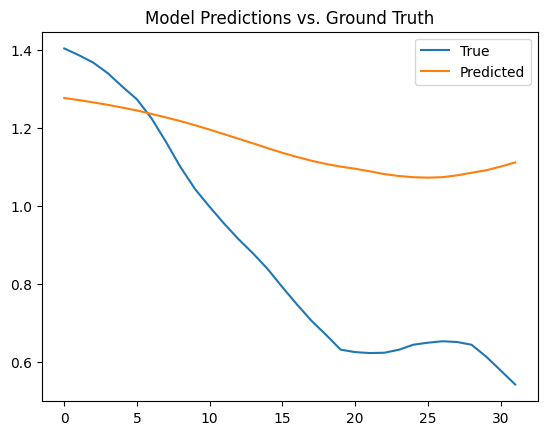

In [116]:
inputs, y_true = next(test_gen)
y_pred = model.predict(inputs)

import matplotlib.pyplot as plt
plt.plot(y_true, label="True") # sample index within batch
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Model Predictions vs. Ground Truth")
plt.show()
